In [2]:
# importing libs

import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pylab import rcParams
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [3]:
# file paths

train_path = 'E:\\Projects\\Temperature-Time-Series-using-ARIMAxPHOPHET\\data\\DailyDelhiClimateTrain.csv'

test_path = 'E:\\Projects\\Temperature-Time-Series-using-ARIMAxPHOPHET\\data\\DailyDelhiClimateTest.csv'

In [4]:
# load dataset 

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df_train = pd.read_csv(train_path , parse_dates = ['date'], index_col = 'date', date_parser = dateparse)
df_test = pd.read_csv(test_path , parse_dates = ['date'], index_col = 'date', date_parser = dateparse)

In [5]:
print('Observations: ',df_train.shape[0])
print('Features: ',df_train.shape[1])

Observations:  1462
Features:  4


In [6]:
df_train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [7]:
df_train.info()

df_train.describe

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


<bound method NDFrame.describe of              meantemp    humidity  wind_speed  meanpressure
date                                                       
2013-01-01  10.000000   84.500000    0.000000   1015.666667
2013-01-02   7.400000   92.000000    2.980000   1017.800000
2013-01-03   7.166667   87.000000    4.633333   1018.666667
2013-01-04   8.666667   71.333333    1.233333   1017.166667
2013-01-05   6.000000   86.833333    3.700000   1016.500000
...               ...         ...         ...           ...
2016-12-28  17.217391   68.043478    3.547826   1015.565217
2016-12-29  15.238095   87.857143    6.000000   1016.904762
2016-12-30  14.095238   89.666667    6.266667   1017.904762
2016-12-31  15.052632   87.000000    7.325000   1016.100000
2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 4 columns]>

In [8]:
# separated series for each feature

time_series_temp = df_train['meantemp']
time_series_hum = df_train['humidity']
time_series_wind = df_train['wind_speed']
time_series_pres = df_train['meanpressure']

In [9]:
# plot mean temperature
fig = px.line(df_train, x=df_train.index, y="meantemp", title='Mean temperature')
fig.show()

In [10]:
# plot humidity
fig = px.line(df_train, x=df_train.index, y="humidity", title='Humidity')
fig.show()

In [11]:
# plot wind speed
fig = px.line(df_train, x=df_train.index, y="wind_speed", title='Wind Speed')
fig.show()

In [12]:
# plot mean pressure
fig = px.line(df_train, x=df_train.index, y='meanpressure', title='Mean Pressure')
fig.show()

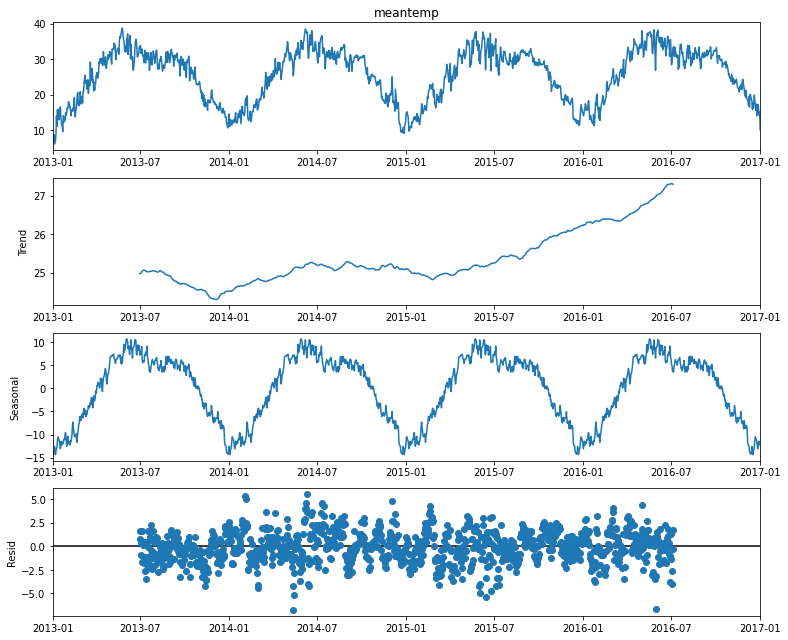

In [13]:
# decompose the mean temperature in trend, seasonal and resids to know main trend and the frequent moviments

rcParams['figure.figsize'] = 11, 9
decomposed_meantemp_volume = sm.tsa.seasonal_decompose(time_series_temp,period=360) # The frequncy is annual
figure = decomposed_meantemp_volume.plot()
plt.show()

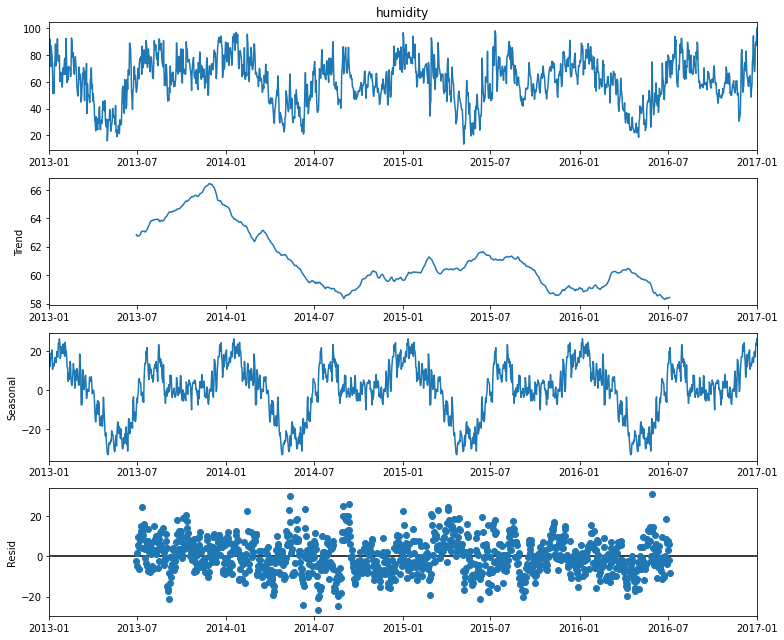

In [14]:
# decompose the humidity in trend, seasonal and resids to know main trend and the frequent moviments

rcParams['figure.figsize'] = 11, 9
decomposed_meantemp_volume = sm.tsa.seasonal_decompose(time_series_hum,period=360) # The frequncy is annual
figure = decomposed_meantemp_volume.plot()
plt.show()

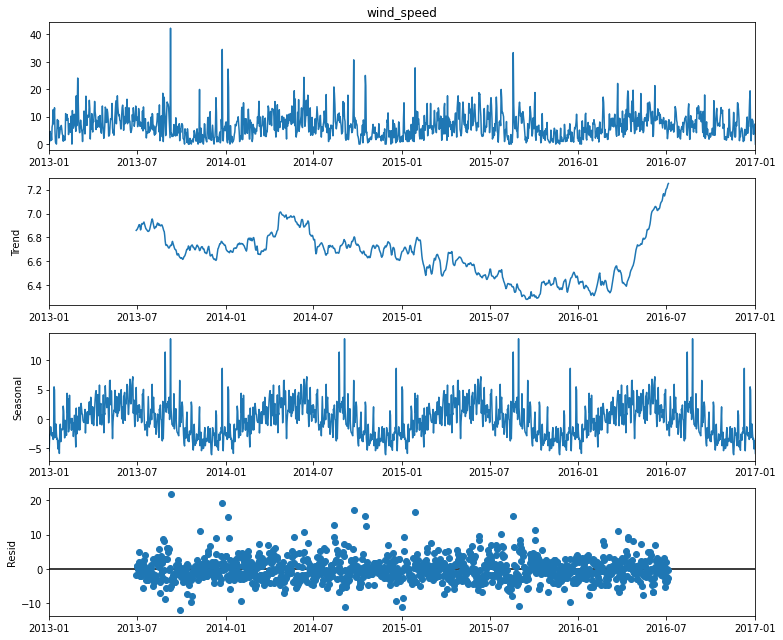

In [15]:
# decompose the wind speed in trend, seasonal and resids to know main trend and the frequent moviments

rcParams['figure.figsize'] = 11, 9
decomposed_meantemp_volume = sm.tsa.seasonal_decompose(time_series_wind,period=360) # The frequncy is annual
figure = decomposed_meantemp_volume.plot()
plt.show()

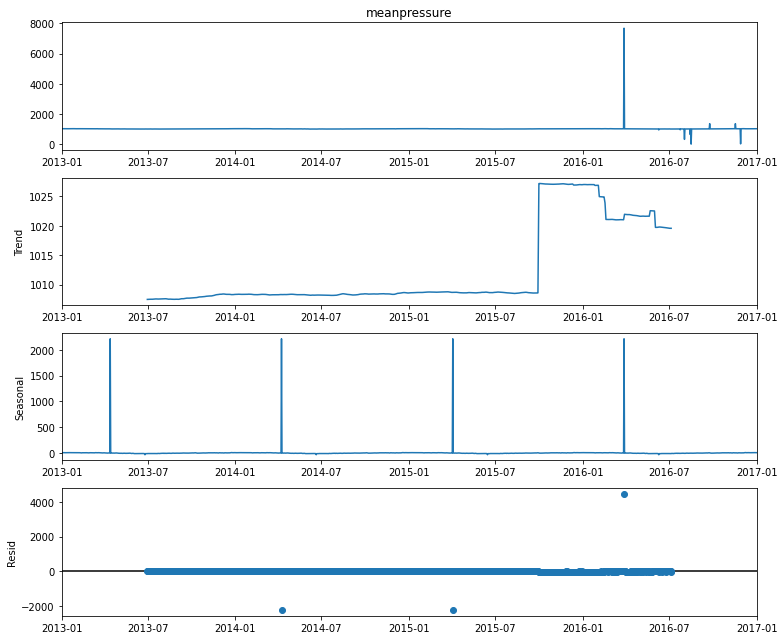

In [16]:
# decompose the mean pressure in trend, seasonal and resids to know main trend and the frequent moviments

rcParams['figure.figsize'] = 11, 9
decomposed_meantemp_volume = sm.tsa.seasonal_decompose(time_series_pres,period=360) # The frequncy is annual
figure = decomposed_meantemp_volume.plot()
plt.show()